# MSDM5004 Homework 3

## 1. Consider the equation

$$
\frac{\partial u}{\partial t}=\frac{\partial^2 u}{\partial x^2}
$$

Show that the numerical scheme

$$
\frac{U^{n+1}_j-U^{n-1}_j}{2\Delta t}
=\frac{U^n_{j+1} -2 U^n_j+ U^n_{j-1}}{(\Delta x)^2}
$$

is second order both in time and space.

**Truncation Error**:

$$
T(x_j,t_n) = \frac{u(x_j,t_{n+1})-u(x_j,t_{n-1})}{2\Delta t}
-\frac{u(x_{j+1},t_n)-2u(x_j,t_n)+u(x_{j-1},t_n)}{(\Delta x)^2}
$$

Using Taylor expansion:
$$
\begin{align}
u(x_j,t_{n+1})&=u(x_j,t_n)+\frac{\partial}{\partial t}u(x_j,t_n)\Delta t+\frac12 \frac{\partial^2}{\partial t^2}u(x_j,t_n)\Delta t^2+\frac16 \frac{\partial^2}{\partial t^3}u(x_j,t_n)\Delta t^3+O(\Delta t^4)\\
\frac{u(x_j,t_{n+1})-u(x_j,t_n)}{\Delta t}&=\frac{\partial}{\partial t}u(x_j,t_n)+\frac12 \frac{\partial^2}{\partial t^2}u(x_j,t_n)\Delta t+\frac16 \frac{\partial^2}{\partial t^3}u(x_j,t_n)\Delta t^2+O(\Delta t^3)
\end{align}
$$

$$
\begin{align}
u(x_j,t_{n-1})&=u(x_j,t_n)-\frac{\partial}{\partial t}u(x_j,t_n)\Delta t+\frac12 \frac{\partial^2}{\partial t^2}u(x_j,t_n)\Delta t^2-\frac16 \frac{\partial^2}{\partial t^3}u(x_j,t_n)\Delta t^3+O(\Delta t^4)\\
\frac{u(x_j,t_{n-1})-u(x_j,t_n)}{\Delta t}&=-\frac{\partial}{\partial t}u(x_j,t_n)+\frac12 \frac{\partial^2}{\partial t^2}u(x_j,t_n)\Delta t-\frac16 \frac{\partial^2}{\partial t^3}u(x_j,t_n)\Delta t^2+O(\Delta t^3)
\end{align}
$$

Then,

$$
\frac{u(x_j,t_{n+1})-u(x_j,t_{n-1})}{2\Delta t}=\frac{\partial}{\partial t}u(x_j,t_n)+\frac16 \frac{\partial^2}{\partial t^3}u(x_j,t_n)\Delta t^2+O(\Delta t^3)
$$

Therefore,

$$
T(x_j,t_n)=\frac16 \frac{\partial^2}{\partial t^3}u(x_j,t_n)\Delta t^2-\frac1{12}\frac{\partial^4}{\partial x^4}u(x_j,t_n)\Delta x^2+O(\Delta t^3)+O(\Delta x^3)
$$

Then, it's second order both in time and space.

## 2. Consider the problem
$$
\begin{cases}
\frac{\partial u}{\partial t}=\frac{\partial^2 u}{\partial x^2}, &0 < x < 1, t > 0\\
u(0, t) = u(1, t) = 0,&t > 0\\
u(x, 0) = u_0(x), &0\leq x\leq 1\\
\end{cases}
$$
where
$$
u_0(x) =
\begin{cases}
-x,& 0\leq x\leq \frac12\\
x-1,& \frac12 < x \leq 1.
\end{cases}
$$

Write a code to obtain numerical solution using the explicit scheme. Use $J = 20, ∆x = 0.05$, and (i) $∆t = 0.0012$ (ii) $∆t = 0.0013$. Plot the numerical solution and the analytical solution at $t = 0, ∆t, 20∆t, 40∆t, 60∆t$. 

In [1]:
u₀(x) = x > .5 ? x - 1 : -x;

In [2]:
function heat_pde_solve(u₀;x₀=0,xₘ=1,N=60,Δt=0.001,Δx=0.05,a=1)
    x = x₀:Δx:xₘ
    t = 0:Δt:N*Δt
    U₀ = u₀.(x)
    M = length(U₀)
    U = [U₀ zeros(M,N)]
    U[1,:] .= U₀[1]
    U[end,:] .= U₀[end]
    μ = Δt/Δx^2
    js = 2:(M-1)
    for n in 1:N
        U[js,n+1] = U[js,n] + a * μ * (U[js.+1,n]-2U[js,n]+U[js.-1,n]) 
    end
    return x,t,U
end

# analytical series solution for heat pde(a=1)
function u(x,t;M=20)
    a(m) = 2(sin(π*m) - 2sin((π*m)/2))/(π^2*m^2)
    uₘ(m;x=x,t=t) = a(m)*exp(-(m*π)^2*t)*sin(m*π*x)
    return sum(uₘ.(1:M))
end

u (generic function with 1 method)

In [3]:
using Plots
plotlyjs();

function heat_pde_plots(x,t,U;Δt=0.001)
    ns = [0;10;20;40;60]
    plot()
    for n in ns
        plot!(x,U[:,n+1],label="numerical(t=$(n)Δt)",marker=:circle,linestyle=:dash) 
        plot!(x,u.(x,n*Δt),label="analytical(t=$(n)Δt)")
    end
    xlabel!("x")
    ylabel!("u")
end

WebIO._IJuliaInit()

heat_pde_plots (generic function with 1 method)

### (i) $∆t = 0.0012$

In [4]:
x,t₁₂,U₁₂ = heat_pde_solve(u₀;x₀=0,xₘ=1,N=60,Δt=0.0012,Δx=0.05);

In [5]:
Δt = 0.0012
surface(t₁₂,x,U₁₂,xlabel="t",ylabel="x",zlabel="u")
title!("head pde solution's 3d plot(Δt=$Δt)")

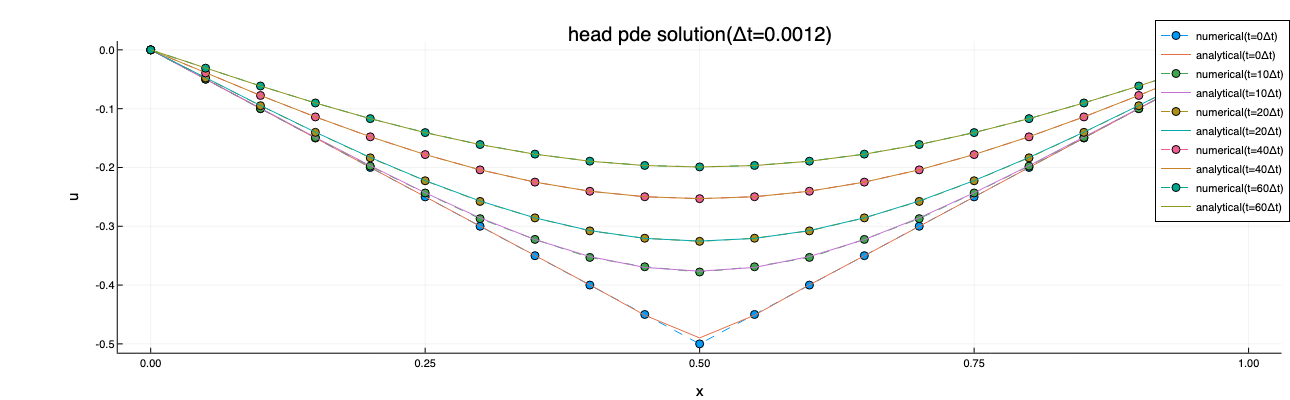

In [6]:
Δt = 0.0012
heat_pde_plots(x,t₁₂,U₁₂;Δt=Δt)
title!("head pde solution(Δt=$Δt)")

### (ii) $∆t = 0.0013$

In [7]:
x,t₁₃,U₁₃ = heat_pde_solve(u₀;x₀=0,xₘ=1,N=60,Δt=0.0013,Δx=0.05);

In [8]:
Δt = 0.0013
surface(t₁₃,x,U₁₃,xlabel="t",ylabel="x",zlabel="u")
title!("head pde solution's 3d plot(Δt=$Δt)")

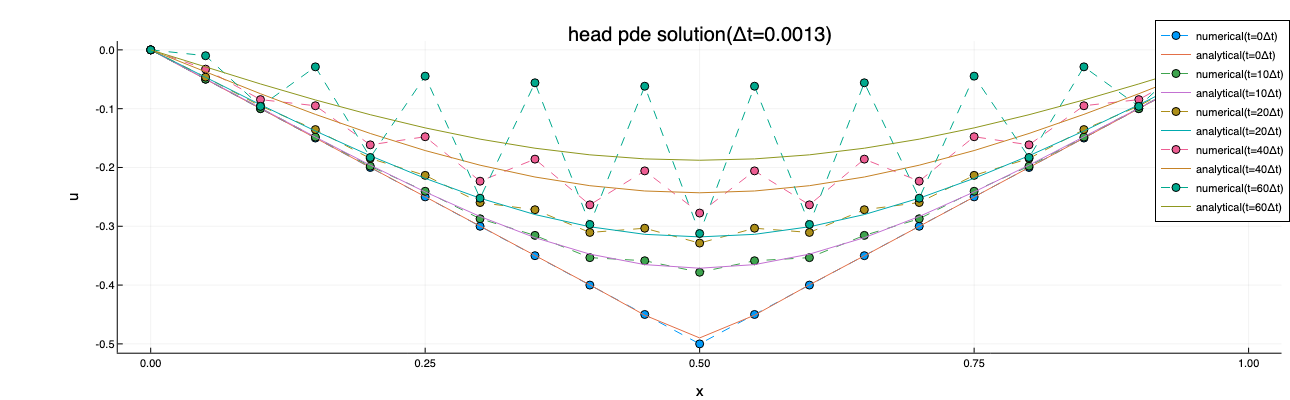

In [9]:
Δt = 0.0013
heat_pde_plots(x,t₁₃,U₁₃;Δt=Δt)
title!("head pde solution(Δt=$Δt)")

## 3. Write a code to solve the PDE in problem 2 using the Crank-Nicolson method.

In [10]:
using LinearAlgebra

function heat_pde_CNmethod(u₀;x₀=0,xₘ=1,N=60,Δt=0.001,Δx=0.05,a=1)
    x = x₀:Δx:xₘ
    t = 0:Δt:N*Δt
    U₀ = u₀.(x)
    M = length(U₀)
    U = [U₀ zeros(M,N)]
    μ = Δt/Δx^2
    Σ = Tridiagonal(-ones(M-1),2ones(M),-ones(M-1))
    Σ[1,1:2] .= 0
    Σ[end,end-1:end] .= 0
    A = I + a*μ*Σ
    for n in 1:N
        U[:,n+1] = A \ U[:,n]
    end
    return x,t,U
end

heat_pde_CNmethod (generic function with 1 method)

### (i) $∆t = 0.0012$

In [11]:
x,t₁₂,U₁₂ = heat_pde_CNmethod(u₀;x₀=0,xₘ=1,N=60,Δt=0.0012,Δx=0.05);

In [12]:
Δt = 0.0012
surface(t₁₂,x,U₁₂,xlabel="t",ylabel="x",zlabel="u")
title!("head pde solution's 3d plot(Δt=$Δt)")

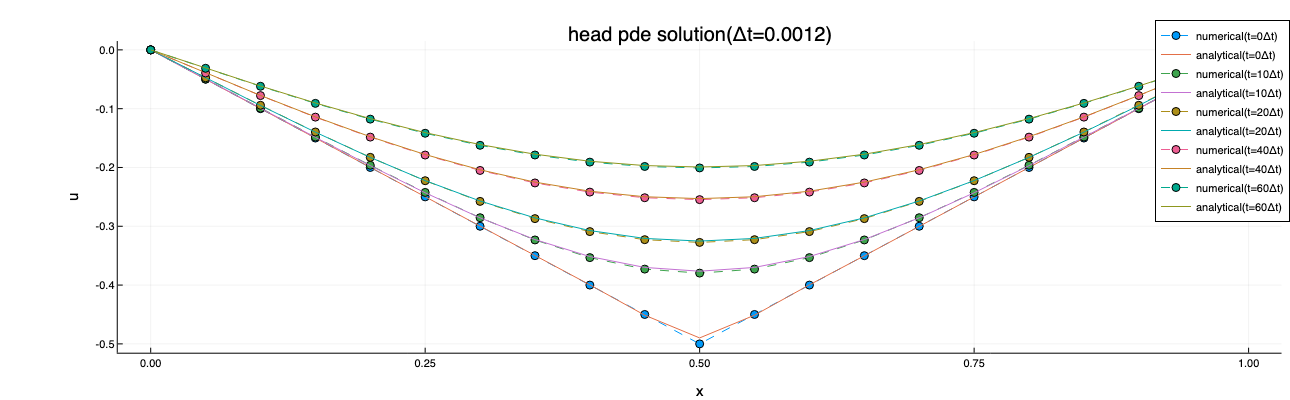

In [13]:
Δt = 0.0012
heat_pde_plots(x,t₁₂,U₁₂;Δt=Δt)
title!("head pde solution(Δt=$Δt)")

### (i) $∆t = 0.0013$

In [14]:
x,t₁₃,U₁₃ = heat_pde_CNmethod(u₀;x₀=0,xₘ=1,N=60,Δt=0.0013,Δx=0.05);

In [15]:
Δt = 0.0013
surface(t₁₃,x,U₁₃,xlabel="t",ylabel="x",zlabel="u")
title!("head pde solution's 3d plot(Δt=$Δt)")

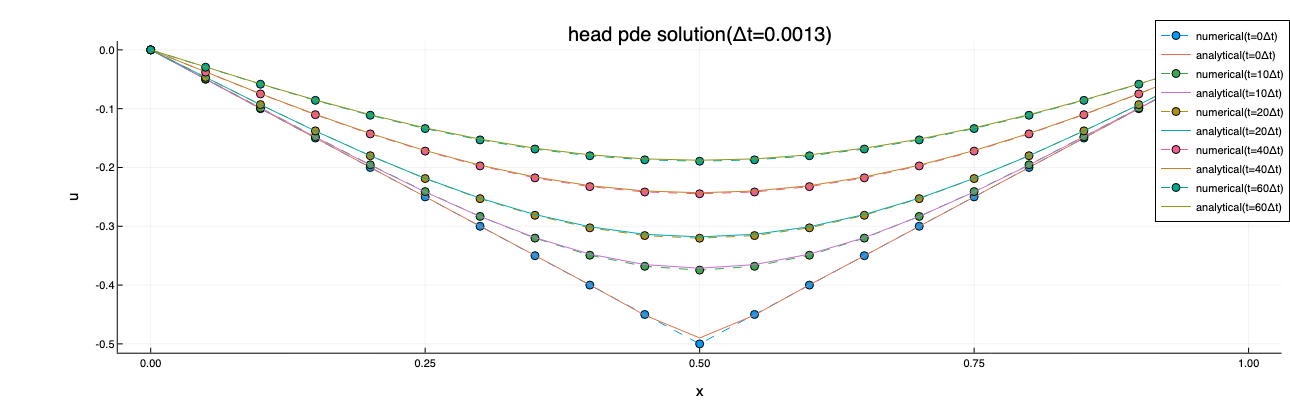

In [16]:
Δt = 0.0013
heat_pde_plots(x,t₁₃,U₁₃;Δt=Δt)
title!("head pde solution(Δt=$Δt)")